In [1]:
from datetime import datetime
#import matplotlib
#matplotlib.use("Agg")
from matplotlib import pyplot as plt
from pathlib import Path
import shap
import sys

from etl_tsc import load_data
from utility import parse_config

paths = "/proj/hajaalin/Projects/n_track_ML/scripts/tsc/paths.yml"
paths = parse_config(paths)
    
# add InceptionTime source to Python path
src_inceptiontime = paths["src"]["inceptiontime"]
sys.path.insert(1, src_inceptiontime)
from cv_inceptiontime import inceptiontime_cv_repeat

# read the data 
data_dir = paths["data"]["dir"]
raw_data_file = paths["data"]["raw_data_file"]
data = load_data(Path(data_dir) / raw_data_file)

# parameters
fset = "f_dxy_mindist_angle_area"
kernel_size = 20
epochs = 20
max_repeats = 100
job_name = "shap_inceptiontime"
job_id = "1"
now = datetime.now().strftime("%Y%m%d%H%M%S")

# output folders
output_shap = Path(paths["output"]["shap"]) / job_name / now
output_shap.mkdir(parents=True, exist_ok=True)
output_it = Path(paths["output"]["it"]) / job_id
output_it.mkdir(parents=True, exist_ok=True)
output_it = str(output_it) + "/"


model_eval = inceptiontime_cv_repeat(data, output_it, fset, kernel_size=kernel_size, epochs=epochs, repeats=max_repeats, job_id=job_id, return_model_eval=True)

model, feature_names, shap_values, X_test, pred, truth = model_eval




Matplotlib created a temporary config/cache directory at /tmp/matplotlib-c0y8ik1l because the default path (/home/hajaalin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/proj/hajaalin/Miniconda3/4.11.0/envs/tsc_jupyter_shap/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future vers

1.0.2
0.10.1
Index(['dxy', 'serum_conc_percent', 'file', 'min_dist_pxs', 'angle', 'dangle',
       'area_micron'],
      dtype='object')
Index(['dxy', 'min_dist_pxs', 'angle', 'dangle', 'area_micron'], dtype='object')
repeat: 1/100


2022-10-07 12:08:52.390958: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.6756756756756757
0.9436619718309859
1.0
0.9473684210526315
repeat: 2/100
0.6142857142857143
0.84
1.0
1.0
repeat: 3/100
0.56
1.0
0.9577464788732394
0.9714285714285714
sufficiently accurate model found


`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


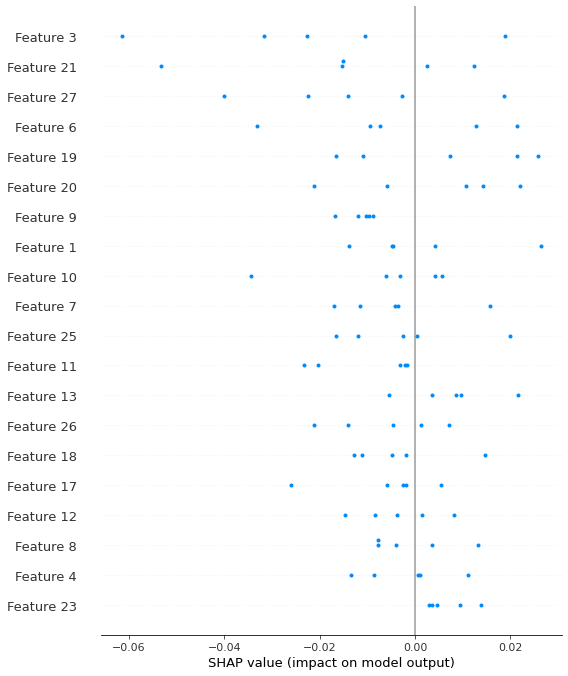

In [2]:
shap.summary_plot(shap_values[0][0])
    

In [3]:
print(X_test.shape)
print(X_test[0].shape)
print(X_test[0][0].shape)
print(feature_names[0])

(70, 5, 28)
(5, 28)
(28,)
dxy


In [4]:
print(len(shap_values)) # model outputs (number of classes)
print(shap_values[0].shape) # samples
print(shap_values[0][0].shape) # features
print(shap_values[0][0][0].shape) # time points


2
(70, 5, 28)
(5, 28)
(28,)


In [5]:
shap_values[0][0][0]

array([-0.00603315,  0.02637476, -0.00671997, -0.02263714,  0.01116165,
        0.00577323,  0.02142206, -0.00351955, -0.00399545, -0.00885161,
       -0.03432275, -0.02319577,  0.00138468,  0.009575  ,  0.000692  ,
       -0.00319988, -0.01178144, -0.02611721, -0.00186853,  0.02141081,
        0.01434415,  0.0124372 , -0.01555242,  0.01379803, -0.00148564,
        0.02004136,  0.0072033 , -0.02240717])

In [6]:
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])

In [7]:
truth

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])

In [14]:
import numpy as np
mask = (truth==0) & (pred==0)
mask

array([False, False, False, False, False, False,  True,  True,  True,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True])

In [15]:
np.argmin(mask)
np.argmax(mask)

6

In [16]:
sample0 = np.argmin(mask)
sample1 = np.argmax(mask)
print(sum(sum(shap_values[0][sample0]))) # sample 0: pred == truth == 1
print(sum(sum(shap_values[0][sample1]))) # sample 4: pred == truth == 0


-0.4841856371203903
0.6055772439212888


In [17]:
sv = shap_values.copy()

In [18]:
print(shap_values[0].shape)
print(shap_values[0].size)
shap_array = shap_values[0].copy().reshape(shap_values[0].size, 1)
print(shap_array.shape)
print(shap_values[0].shape)

(70, 5, 28)
9800
(9800, 1)
(70, 5, 28)


(array([2.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 1.100e+01, 4.000e+00, 3.000e+00, 6.000e+00, 1.000e+01,
        1.100e+01, 1.600e+01, 1.800e+01, 3.100e+01, 5.000e+01, 3.700e+01,
        5.800e+01, 7.900e+01, 1.210e+02, 2.200e+02, 3.250e+02, 5.740e+02,
        1.053e+03, 2.019e+03, 2.075e+03, 1.177e+03, 6.250e+02, 3.470e+02,
        2.530e+02, 1.540e+02, 1.140e+02, 7.800e+01, 6.100e+01, 3.900e+01,
        3.800e+01, 3.200e+01, 2.300e+01, 2.400e+01, 1.600e+01, 1.000e+01,
        6.000e+00, 1.300e+01, 4.000e+00, 7.000e+00, 5.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

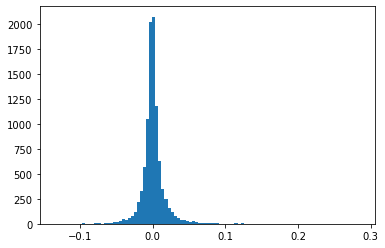

In [19]:
plt.hist(shap_array, bins=100)

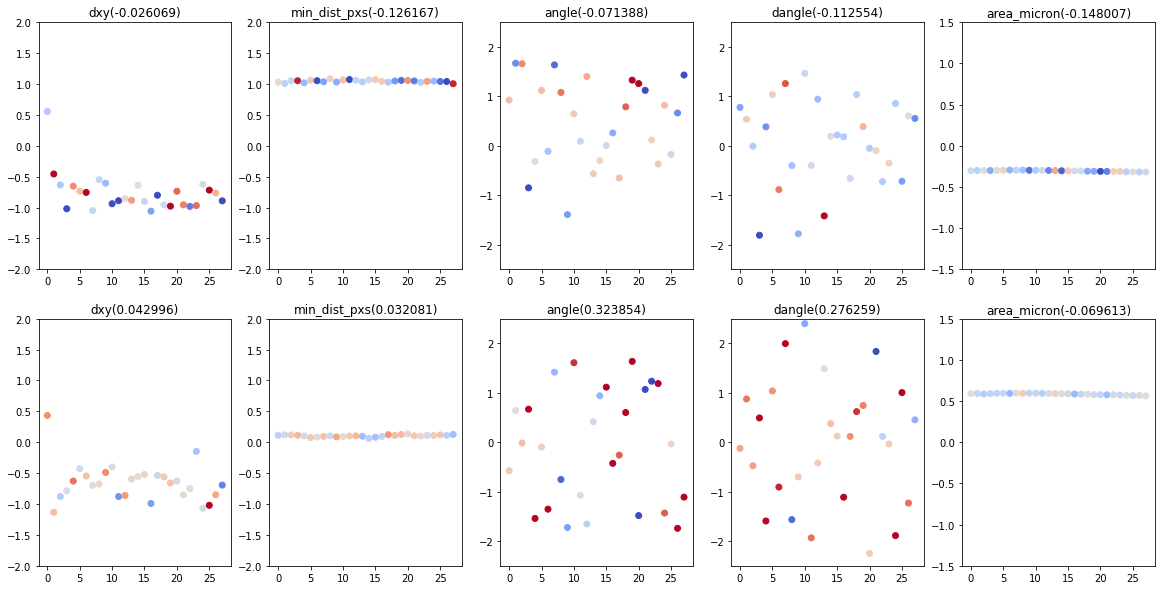

In [28]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2,5)
fig.set_size_inches(20,10)

model_output = 0
time_axis = list(range(shap_values[0].shape[2]))
ymin = [-2, -2, -2.5, -2.5, -1.5]
ymax = [2, 2, 2.5, 2.5, 1.5]

# adjust colormap min/max
shap_min = -0.02
shap_max = 0.02

samples = [sample0, sample1]
for s in range(len(samples)):
    for i in range(5):
        shap_values_for_feature = shap_values[model_output][samples[s]][i]
        axs[s][i].scatter(time_axis, X_test[samples[s]][i], c=shap_values_for_feature, cmap='coolwarm', vmin=shap_min, vmax=shap_max)
        shap_feature_sum = sum(shap_values_for_feature)
        axs[s][i].set_title(feature_names[i] + "(%f)" % shap_feature_sum)
        axs[s][i].set_ylim([ymin[i], ymax[i]])


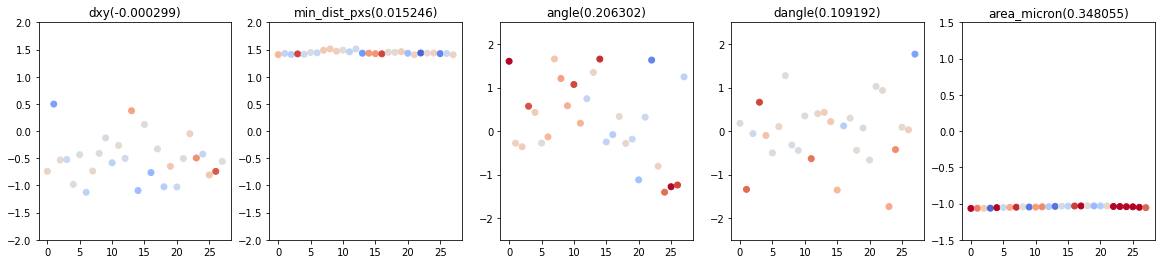

In [79]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1,5)
fig.set_size_inches(20,4)

sample = 4
time_axis = list(range(28))
for i in range(5):
    shap_values_for_feature = shap_values[model_output][sample][i]
    axs[i].scatter(time_axis, X_test[sample][i], c=shap_values_for_feature, cmap='coolwarm', vmin=shap_min, vmax=shap_max)
    shap_feature_sum = sum(shap_values_for_feature)
    axs[i].set_title(feature_names[i] + "(%f)" % shap_feature_sum)
    axs[i].set_ylim([ymin[i], ymax[i]])


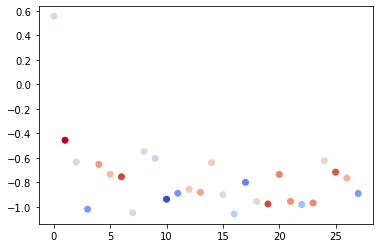

In [25]:
plt.scatter(list(range(28)), X_test[sample0][0], c=shap_values[0][sample0][0], cmap='coolwarm')


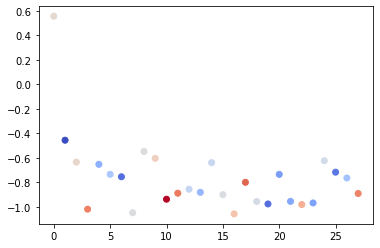

In [27]:
plt.scatter(list(range(28)), X_test[sample0][0], c=shap_values[1][sample0][0], cmap='coolwarm')
